# Applying threshold on quality and read depth

Used `bcftools` [see](https://samtools.github.io/bcftools/howtos/variant-calling.html) for more details.

TODO: Look into [VQSLOD](https://gatk.broadinstitute.org/hc/en-us/articles/360035531112--How-to-Filter-variants-either-with-VQSR-or-by-hard-filtering) filtering.

## Understanding which threshold to choose

### Looked into data `QUAL` column.

In [17]:
from utils.bam_vcf_utils import read_raw_zipped_vcf_file

In [18]:
root_dir = "/path/to/project/data/root"
vcf38 = root_dir + "GENOME.unfiltered.vcf.gz"

In [19]:
vcf38_df = read_raw_zipped_vcf_file(vcf38)
vcf38_df[["QUAL"]] = vcf38_df[["QUAL"]].astype(float)
vcf38_df

#### See distribution of quality values

array([[<AxesSubplot:title={'center':'QUAL'}>]], dtype=object)

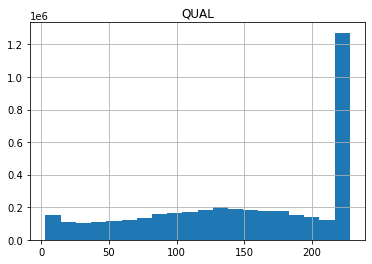

In [20]:
vcf38_df[["QUAL"]].hist(bins=20)

In [21]:
vcf38_df[["QUAL"]].quantile([.03, .05, .1, .2])

,QUAL
0.03,11.508759
0.05,19.521000
0.10,41.750700
0.20,80.000000


### Do filtering

Arbitrarily thresholds picked:
 - Quality threshold of `20` to remove very uncertain variants - removed around 5% of them (`QUAL` column in vcf)
 - Sequencing depth threshold `10` for X30 sequencing (`INFO/DP` in vcf) 

Run filtering:

In [23]:
%%bash

set -x
VCF_UNFILTERED_GZ=/path/to/vcf/GENOME12345.vcf.gz
VCF_FILTERED=/path/to/vcf/output/GENOME12345.filtered.vcf
VCF_FILTERED_GZ=$VCF_FILTERED".gz"

time bcftools view -i '%QUAL>20 && INFO/DP>10' $VCF_UNFILTERED_GZ > $VCF_FILTERED
bgzip -c $VCF_FILTERED > $VCF_FILTERED_GZ
tabix -p vcf $VCF_FILTERED_GZ